In [2]:
import math
import os
import random

import numpy as np
import matplotlib.pyplot as plt
import mlx.core as mx

from main import *

%load_ext autoreload
%autoreload 2

In [3]:
X_train, y_train, X_test, y_test = load_donut(ntrain=32)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (32, 2)
Training labels shape:  (32,)
Test data shape:  (8, 2)
Test labels shape:  (8,)


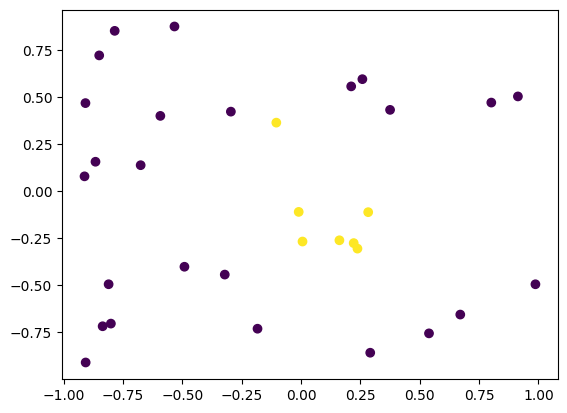

In [4]:
fig, ax = plt.subplots()

X = X_train[:, 0]
Y = X_train[:, 1]

ax.scatter(X, Y, c=y_train)

In [5]:
# TODO: Prepro, split into validation

In [ ]:
lr = 1e-3
input_dim = X_train.shape[-1]
hidden_dim = 1

cell = rnncellnew(input_dim, hidden_dim)
fwd = rnncellfwd
model = (fwd, cell)

sgd = sgdnew(lr=lr)

sgdsolve(sgd, (rnnce))

array([0.70872593])